# Image processing: Spatial filters

In [2]:
# Import all of the libraries that we need
import matplotlib.style
from skimage import data, filters
from skimage.filters import unsharp_mask
import skimage as ski
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage.restoration import denoise_bilateral
from skimage.morphology import disk, ball

# Set the style of the matplotlib
#matplotlib.style.available
matplotlib.style.use('seaborn-v0_8-bright')

In [3]:
# set directories
output_dir = "E:\RADMEP_stuff\Semester_2_KU_Leuven\KU_Leuven_learn\Image_sensor\Image_processing\outputs"

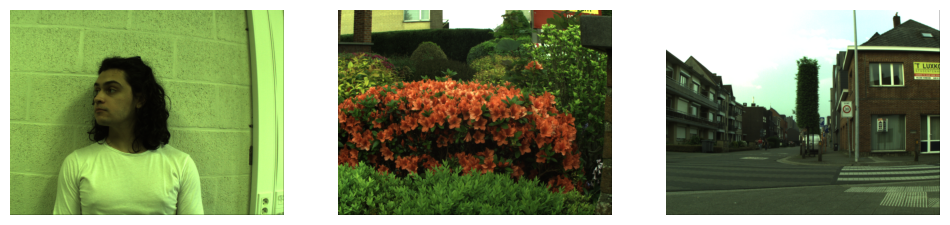

In [4]:
# Import the original image
Fig_ori, ax_ori = plt.subplots(1,3, figsize = (12,5))
Nico = ski.io.imread("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\sample_images\\Nico23.png")
Flower = ski.io.imread("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\sample_images\\flower1.png")
Street = ski.io.imread("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\sample_images\\Street12345.png")
samp_images = [Nico,Flower,Street]
for i, imag in enumerate(samp_images):
    ax_ori[i].imshow(imag)
    ax_ori[i].set_axis_off()
plt.show()

In [5]:
print(Nico.shape)

(960, 1278, 3)


In [6]:
def separate_channels(filt, imag, separate = True, mult = False, **kwargs):
    
    if separate == True:
        if mult == True:
            filtered_1, _ = filt(imag[:,:,0], **kwargs)
            filtered_2, _ = filt(imag[:,:,1], **kwargs)
            filtered_3, _ = filt(imag[:,:,2], **kwargs)
        else:
            filtered_1 = filt(imag[:,:,0], **kwargs)
            filtered_2 = filt(imag[:,:,1], **kwargs)
            filtered_3 = filt(imag[:,:,2], **kwargs)

        filtered_imag = np.zeros_like(imag)
        filtered_imag[:,:,0] = filtered_1
        filtered_imag[:,:,1] = filtered_2
        filtered_imag[:,:,2] = filtered_3
        return filtered_imag
    
    else:
        return filt(imag, **kwargs)
        

    

In [7]:
# color weighing

def color_weigh(imag, w):
    
    w = w/np.sum(w)
    
    filtered_1 = imag[:,:,0]*w[0]
    filtered_2 = imag[:,:,1]*w[1]
    filtered_3 = imag[:,:,2]*w[2]
    
    
    filtered_imag = np.zeros_like(imag)
    filtered_imag[:,:,0] = filtered_1
    filtered_imag[:,:,1] = filtered_2
    filtered_imag[:,:,2] = filtered_3
    return filtered_imag

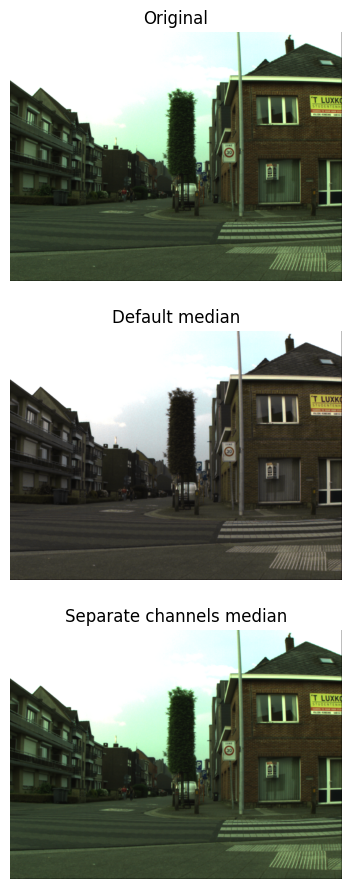

In [8]:
# Median filters
samp_number = 2

#Median = filters.median(samp_images[samp_number])
#Median_rank = filters.median(samp_images[samp_number], behavior="rank")
Median_ndimage = filters.median(samp_images[samp_number], behavior="ndimage")
Fig_median, ax_median = plt.subplots(ncols=1, nrows=3, figsize = (5,11))
ax_median[0].imshow(samp_images[samp_number])
ax_median[0].set_title("Original")
ax_median[0].set_axis_off()
ax_median[1].imshow(Median_ndimage)
ax_median[1].set_title("Default median")
ax_median[1].set_axis_off()
ax_median[2].imshow(separate_channels(filters.median, samp_images[samp_number], behavior = "ndimage"))
ax_median[2].set_title("Separate channels median")
ax_median[2].set_axis_off()
#ax_median[1,0].imshow(Median_rank)
#ax_median[1,0].set_title("Rank median")
#ax_median[1,0].set_axis_off()
#ax_median[1,1].imshow(Median_ndimage)
#ax_median[1,1].set_title("ndimage median")
#ax_median[1,1].set_axis_off()
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\median_out.png", dpi =600)
plt.show()

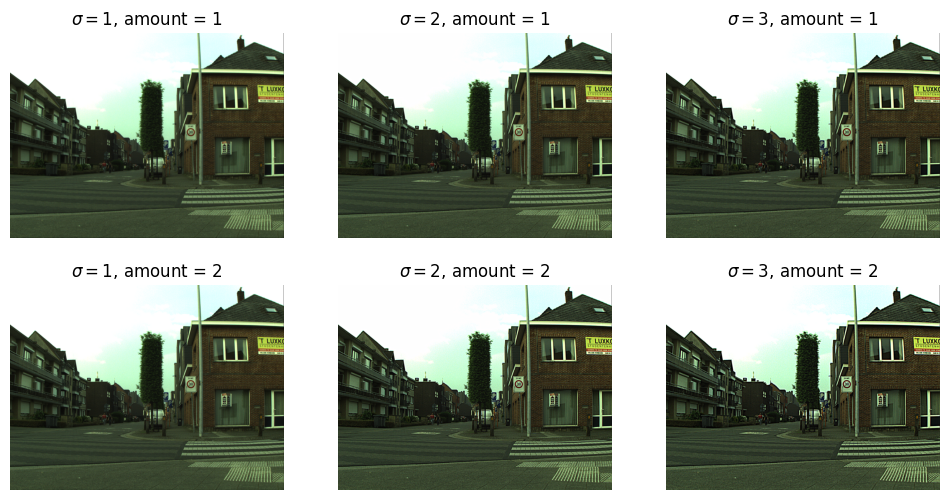

In [9]:
# Gaussian filters
sigma_array = [1,2,3]
Fig_gauss, ax_gauss = plt.subplots(2,len(sigma_array), figsize = (12,6))
for i in range(len(sigma_array)):
    ax_gauss[0][i].imshow(filters.unsharp_mask(samp_images[samp_number], radius = sigma_array[i], amount = 1, channel_axis= 2))
    ax_gauss[0][i].set_axis_off()
    ax_gauss[0][i].set_title(f"$\sigma = {sigma_array[i]}$, amount = 1")
    ax_gauss[1][i].imshow(filters.unsharp_mask(samp_images[samp_number], radius = sigma_array[i], amount = 2, channel_axis= 2))
    ax_gauss[1][i].set_axis_off()
    ax_gauss[1][i].set_title(f"$\sigma = {sigma_array[i]}$, amount = 2")
    
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\unsharp_out.png", dpi = 600)

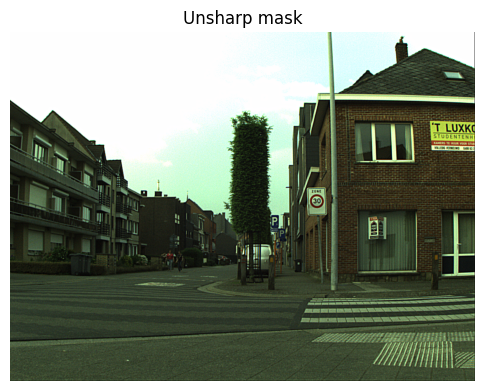

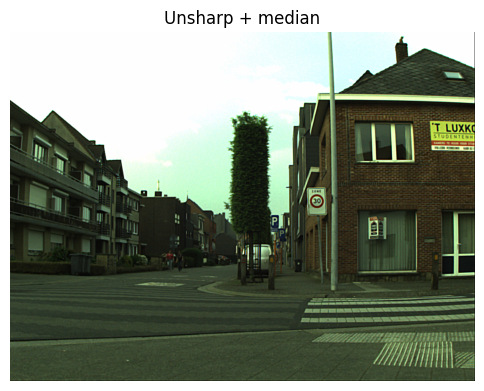

In [13]:
original_img = samp_images[samp_number]



#mult_img = filters.gaussian(mult_img, sigma = 0.5, channel_axis = 2)
#mult_img = filters.gaussian(mult_img, sigma = 0.5)

#mult_img = filters.median(mult_img, ball(2))

#mult_img = separate_channels(filters.rank.mean_bilateral, mult_img, footprint = disk(2), s0 = 50, s1 = 100)
#mult_img = denoise_bilateral(mult_img, sigma_color = 0.5, sigma_spatial = 1, channel_axis=2)
#mult_img = filters.difference_of_gaussians(mult_img, 10, 100, channel_axis = 2)
#mult_img = separate_channels(filters.median, mult_img, behavior = 'cval')
#mult_img = separate_channels(filters.gabor, mult_img, mult = True, frequency = 0.6, bandwidth = 3)
#mult_img = color_weigh(mult_img, [0.35,0.35,0.35])

unsharp_img = unsharp_mask(original_img, radius=2, amount=1.5, channel_axis=2)
final_img = separate_channels(filters.median, unsharp_img, footprint = disk(2))


Fig_unsharp, ax_unsharp = plt.subplots(1,1,figsize = (6,5))
ax_unsharp.imshow(unsharp_img)
ax_unsharp.set_axis_off()
ax_unsharp.set_title("Unsharp mask")
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\unsharp_only.png", dpi = 600)
plt.show()

Fig_final, ax_final = plt.subplots(1,1, figsize = (6,5))
ax_final.imshow(final_img)
ax_final.set_axis_off()
ax_final.set_title("Unsharp + median")
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\unsharp_and_median.png", dpi = 600)
plt.show()

In [14]:
#%matplotlib qt
#filters.try_all_threshold(samp_images[samp_number])

In [18]:
process_img = [original_img, unsharp_img, final_img]
process_titles = ["Original", "Unsharp", "Unsharp + median"]

In [ ]:
# The text: img[220:350, 1150:1277, :]

# The bricks: img[200:500, 700:1150, :]


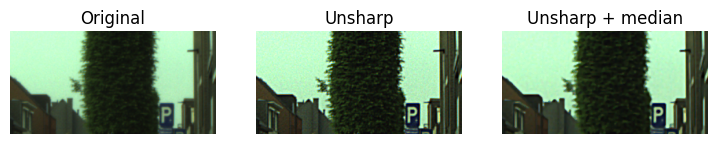

In [45]:
Fig_compare, ax_compare = plt.subplots(1,3, figsize = (9,3))
for i, img in enumerate(process_img):
    ax_compare[i].imshow(img[400:550, 500:800, :])
    ax_compare[i].set_title(process_titles[i])
    ax_compare[i].set_axis_off()
    
plt.savefig("E:\\RADMEP_stuff\\Semester_2_KU_Leuven\\KU_Leuven_learn\\Image_sensor\\Image_processing\\outputs"+"\\compare_treesky.png", dpi = 600)